# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "DAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'DAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.621  1  1.302 0.255 0.007   
                             age        0.113  1  0.237 0.627 0.001   
                             Kiel       1.873  1  3.927 0.049 0.020   
                             Magdeburg  3.862  1  8.098 0.005 0.041   
                             Sweden     6.535  1 13.701 0.000 0.067   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.513  1  0.506 0.478 0.003   
                             age        0.436  1  0.430 0.513 0.002   
                             Kiel       0.079  1  0.078 0.781 0.000   
                             Magdeburg  2.949  1  2.907 0.090 0.015   
                             Sweden    17.298  1 17.051 0.000 0.082   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.593  0.413    False  
                             age               0.203  0.756    False  
                             Kiel              1.310  0.120    False  
                             Magdeburg         2.308  0.019     True  
                             Sweden            3.552  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.321  0.635    False  
                             age               0.290  0.666    False  
                             Kiel              0.107  0.864    False  
                             Magdeburg         1.047  0.192    False  
                             Sweden            4.265  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     DAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.993  1  7.216 0.008 0.036   
                             age        0.003  1  0.023 0.880 0.000   
                             Kiel       0.262  1  1.901 0.170 0.010   
                             Magdeburg  0.516  1  3.752 0.054 0.019   
                             Sweden     1.781  1 12.939 0.000 0.063   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         3.782  1  6.654 0.011 0.034   
                             age        0.758  1  1.333 0.250 0.007   
                             Kiel       3.229  1  5.680 0.018 0.029   
                             Magdeburg  3.338  1  5.873 0.016 0.030   
                             Sweden    28.561  1 50.244 0.000 0.208   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.105  0.022     True  
                             age               0.056  0.923    False  
                             Kiel              0.771  0.274    False  
                             Magdeburg         1.266  0.109    False  
                             Sweden            3.387  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.973  0.028     True  
                             age               0.602  0.373    False  
                             Kiel              1.741  0.044     True  
                             Magdeburg         1.788  0.040     True  
                             Sweden           10.593  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                    DAE                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.008         2.105  0.022     True   
                             age       0.880         0.056  0.923    False   
                             Kiel      0.170         0.771  0.274    False   
                             Magdeburg 0.054         1.266  0.109    False   
                             Sweden    0.000         3.387  0.002     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.011         1.973  0.028     True   
                             age       0.250         0.602  0.373    False   
                             Kiel      0.018         1.741  0.044     True   
                             Magdeburg 0.016         1.788  0.040     True   
                             Sweden    0.000        10.593  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.255         0.593  0.413    False  
                             age       0.627         0.203  0.756    False  
                             Kiel      0.049         1.310  0.120    False  
                             Magdeburg 0.005         2.308  0.019     True  
                             Sweden    0.000         3.552  0.002     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.478         0.321  0.635    False  
                             age       0.513         0.290  0.666    False  
                             Kiel      0.781         0.107  0.864    False  
                             Magdeburg 0.090         1.047  0.192    False  
                             Sweden    0.000         4.265  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'DAE': 'DAE', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.224         3.409     0.277     0.262         2.491     0.339
std       0.295         6.519     0.322     0.303         5.379     0.331
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.000         0.405     0.001     0.004         0.327     0.014
50%       0.055         1.262     0.109     0.121         0.919     0.241
75%       0.393         3.432     0.525     0.471         2.443     0.628
max       1.000        85.912     1.000     1.000       146.473     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                       DAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.008         2.105   
A0A024R0T9;K7ER74;P02655                           AD     0.036         1.450   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.228         0.642   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.253         0.597   
A0A075B6H7                                         AD     0.018         1.748   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.283         0.549   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.767         0.115   
S4R3U6                                             AD     0.011         1.973   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.022     True   
A0A024R0T9;K7ER74;P02655                           AD      0.077    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.347    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.377    False   
A0A075B6H7                                         AD      0.043     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.282    False   
Q9Y6X5                                             AD      0.411    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.155    False   
Q9Y6Y9                                             AD      0.844    False   
S4R3U6                                             AD      0.028     True   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.255         0.593   
A0A024R0T9;K7ER74;P02655                           AD     0.069         1.162   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.060         1.221   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.510         0.292   
A0A075B6H7                                         AD     0.160         0.795   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.031         1.515   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.485         0.315   
S4R3U6                                             AD     0.478         0.321   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.413    False  
A0A024R0T9;K7ER74;P02655                           AD      0.157    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.142    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.664    False  
A0A075B6H7                                         AD      0.297    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.242         1.586     0.301     0.253         1.410     0.336
std       0.295         1.845     0.319     0.290         1.639     0.316
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.007         0.362     0.020     0.011         0.358     0.037
50%       0.085         1.069     0.158     0.123         0.909     0.246
75%       0.435         2.154     0.565     0.439         1.945     0.600
max       1.000        23.594     1.000     1.000        23.792     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,DAE,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,936,1038


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

DAE                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.008         2.105  0.022   
A0A024R0T9;K7ER74;P02655                           0.036         1.450  0.077   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.228         0.642  0.347   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.253         0.597  0.377   
A0A075B6H7                                         0.018         1.748  0.043   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.282   
Q9Y6X5                                             0.283         0.549  0.411   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.155   
Q9Y6Y9                                             0.767         0.115  0.844   
S4R3U6                                             0.011         1.973  0.028   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.255   
A0A024R0T9;K7ER74;P02655                              False 0.069   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.060   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.510   
A0A075B6H7                                             True 0.160   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.031   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.485   
S4R3U6                                                 True 0.478   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.593  0.413   
A0A024R0T9;K7ER74;P02655                                   1.162  0.157   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.221  0.142   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.292  0.664   
A0A075B6H7                                                 0.795  0.297   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.318   
Q9Y6X5                                                     1.515  0.082   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     0.315  0.641   
S4R3U6                                                     0.321  0.635   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                              

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
DAE (no)  - PI (no)    884
DAE (yes) - PI (yes)   331
DAE (yes) - PI (no)    154
DAE (no)  - PI (yes)    52
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


DAE                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.008         2.105  0.022     True 0.255   
A0A075B6H7                   0.018         1.748  0.043     True 0.160   
A0A075B6J9                   0.013         1.893  0.033     True 0.032   
A0A075B6Q5                   0.010         1.992  0.027     True 0.453   
A0A075B6R2                   0.000         3.412  0.002     True 0.310   
...                            ...           ...    ...      ...   ...   
Q9UMX0;Q9UMX0-2;Q9UMX0-4     0.019         1.729  0.045     True 0.024   
Q9UP79                       0.000         4.275  0.000     True 0.232   
Q9UQ52                       0.001         3.148  0.003     True 0.037   
Q9Y6C2                       0.002         2.670  0.007     True 0.361   
S4R3U6                       0.011         1.973  0.028     True 0.478   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.593  0.413    False       186  
A0A075B6H7                           0.795  0.297    False        91  
A0A075B6J9                           1.489  0.086    False       156  
A0A075B6Q5                           0.344  0.613    False       104  
A0A075B6R2                           0.508  0.476    False       164  
...                                    ...    ...      ...       ...  
Q9UMX0;Q9UMX0-2;Q9UMX0-4             1.620  0.068    False        57  
Q9UP79                               0.634  0.387    False       135  
Q9UQ52                               1.433  0.096    False       188  
Q9Y6C2                               0.442  0.526    False       119  
S4R3U6                               0.321  0.635    False       126  

[206 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,DAE,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.022,0.413,186,DAE (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.077,0.157,195,DAE (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.347,0.142,174,DAE (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.377,0.664,196,DAE (no) - PI (no)
A0A075B6H7,0.043,0.297,91,DAE (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.282,0.318,197,DAE (no) - PI (no)
Q9Y6X5,0.411,0.082,173,DAE (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.155,0.182,197,DAE (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,DAE,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P51674;P51674-2;P51674-3,0.003,0.957,55,DAE (yes) - PI (no),0.954
Q6UWP8,0.005,0.937,59,DAE (yes) - PI (no),0.931
E5RJY1;E7ESM1;Q92597;Q92597-2;Q92597-3,0.001,0.922,60,DAE (yes) - PI (no),0.921
P23560;P23560-2;P23560-3;P23560-4;P23560-5,0.028,0.941,110,DAE (yes) - PI (no),0.913
P05556;P05556-2;P05556-3;P05556-4;P05556-5,0.042,0.951,76,DAE (yes) - PI (no),0.909
...,...,...,...,...,...
A0A0J9YXX1,0.046,0.058,197,DAE (yes) - PI (no),0.011
F5GY80;F5H7G1;P07358,0.046,0.057,197,DAE (yes) - PI (no),0.011
Q9NX62,0.044,0.056,197,DAE (yes) - PI (no),0.011


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_1_DAE


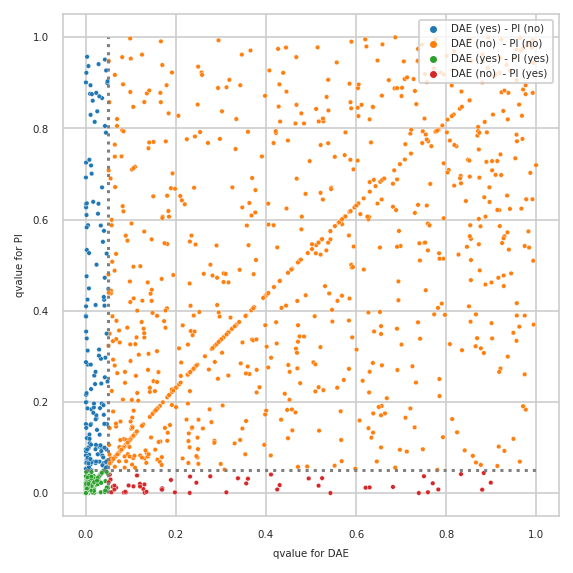

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_2_DAE


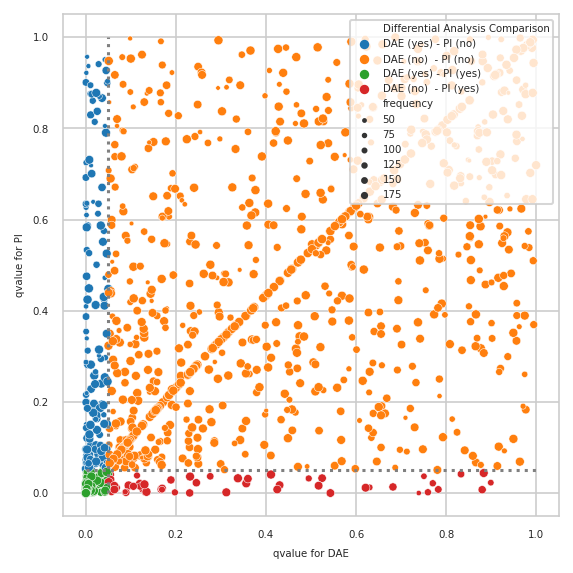

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out